# Desafio FIAP 01
## Criar modelo preditivo de **regressão** para prever o valor dos custos médicos individuais cobrados pelo seguro saúde.

### **A base de dados:**
1338 Linhas com informações sobre a idade, gênero, índice de massa corporal, número de filhos...

### **Objetivo:**
Criar um modelo preditivo e comprovar sua eficácia com métricas e estatísticas.

### **Roteiro:**

* **1 - Configuração:** Importações e leitura do dataset

* **2 - Análise exploratória:** Separar números e texto.

* **3 - Tratamento de dados:** Transformar textos (ex: female, male) em números (0, 1)

* **4 - Divisão:** Separar dados em treino e teste

* **5 - Treinamento do modelo**

* **6 - Avaliar Acurácia do modelo**




# **1 - Configuração**

In [45]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

#Load dos dados:
df = pd.read_csv('insurance.csv')

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **2 - Análise exploratória**

In [72]:
# Regressão só aceita números, validando os tipos e dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   float64
 7   region_southeast  1338 non-null   float64
 8   region_southwest  1338 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 94.2 KB


In [48]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


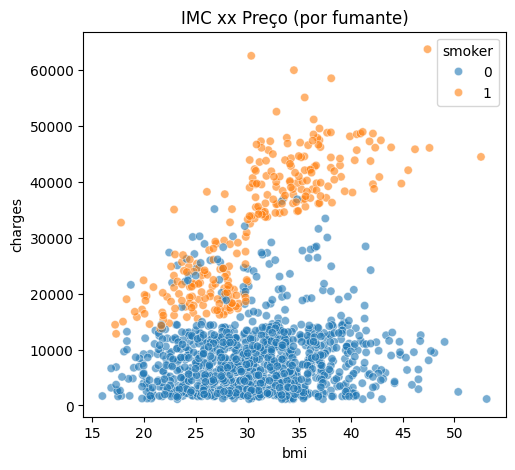

In [75]:
#IMX x Preco por fumante
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title('IMC xx Preço (por fumante)')
plt.show()

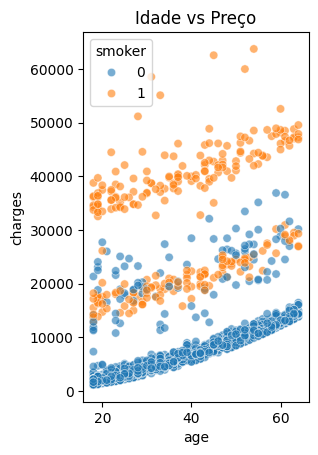

In [78]:
#Idade vs Preço --> Preço maior quanto mais velho
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.6)
plt.title('Idade vs Preço')
plt.show()

#Fumantes são os mais caros

# **3 - Tratamento de dados:**

In [49]:
#Convertendo váriaveis númericas em categóricas
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

#Dados binários para sexo e fumante
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

print(df.head())
print(df.tail())


   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520
      age  sex    bmi  children  smoker     region     charges
1333   50    1  30.97         3       0  northwest  10600.5483
1334   18    0  31.92         0       0  northeast   2205.9808
1335   18    0  36.85         0       0  southeast   1629.8335
1336   21    0  25.80         0       0  southwest   2007.9450
1337   61    0  29.07         0       1  northwest  29141.3603


In [ ]:
#sparce para garantir os zeros
ohe = OneHotEncoder(sparse_output=False, drop='first')

#Matriz com as novas regiões
region_encoded = ohe.fit_transform(df[['region']])
print(region_encoded)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
#Transf em DF
df_region = pd.DataFrame(region_encoded, columns=ohe.get_feature_names_out(['region']))
df_region

,region_northwest,region_southeast,region_southwest
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1333,1.0,0.0,0.0
1334,0.0,0.0,0.0
1335,0.0,1.0,0.0
1336,0.0,0.0,1.0


In [ ]:
#Mesclando
df = pd.concat([df, df_region], axis=1)
df.drop('region', axis=1, inplace=True)

In [53]:
# Resultado Final
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,1.0,0.0,0.0


# 4- **Divisão em treino e teste**

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

#divisão 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Deixando idade na mesma escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# **5- treinando o modelo**


In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# **6 - Avaliar o Modelo**

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error

#prevendo dados teste
y_pred = model.predict(X_test)

#Avaliando o modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MAE: {mae}')

R2: 0.7835929767120724
MAE: 4181.194473753649


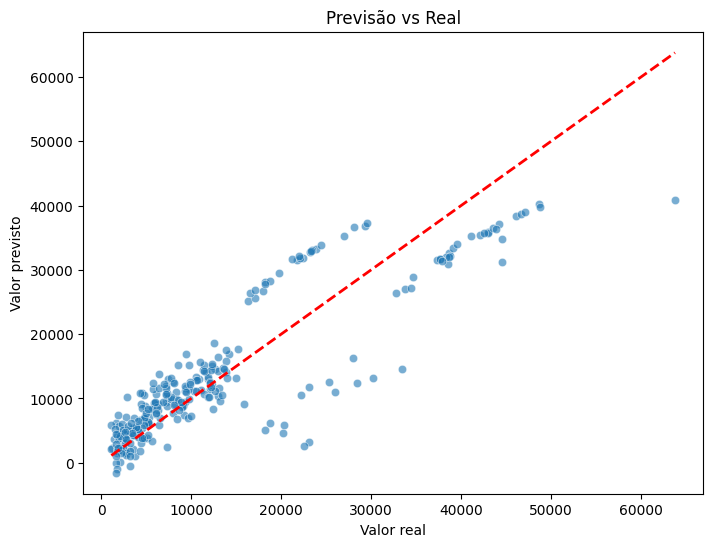

In [80]:
plt.figure(figsize=(8,6))
#Ponto azul previsão
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
#Linha vermelha é o ideal
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.title('Previsão vs Real')
plt.show()